In [1]:
from planning import utils
from shapely import geometry
from trajectory_generator.vehicle_model_node import (
    TrajectoryGenerator,
    Vehicle,
)


In [36]:
vm = TrajectoryGenerator(
                         model=Vehicle(1),
                         step=0.1,
                         r=0.8,
                         r_step=1.0,
        )


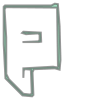

In [37]:
# no obstacle inflation
occ = utils.calculate_occupied_space('/home/basti/ros/driving_swarm_infrastructure/src/driving_swarm_bringup/maps/lndw2022.yaml', inflation=0)
occ

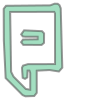

In [38]:
# with obstacle inflation
occ = utils.calculate_occupied_space('/home/basti/ros/driving_swarm_infrastructure/src/driving_swarm_bringup/maps/lndw2022.yaml')
occ

In [39]:
path = vm.tuples_to_path([(0.0, 0.0, 3.0), (1.0, 0.5, 3.1415)])
path

[(0.0, 0.0, 3.0),
 (-0.0785034569232921, 0.015227465160683904, 2.9000000000000004),
 (-0.15509451367683014, 0.03821612474542985, 2.8),
 (-0.22900789773917019, 0.06873628366670748, 2.7),
 (-0.29950509100927764, 0.10648299458519855, 2.5999999999999996),
 (-0.36588170883527144, 0.15107910484280934, 2.5),
 (-0.427474537993027, 0.20207902484735996, 2.4000000000000004),
 (-0.48366816329348233, 0.2589731802564969, 2.3),
 (-0.5339011166077783, 0.3211931034760797, 2.2),
 (-0.5776714868712052, 0.38811711360047035, 2.0999999999999996),
 (-0.6145419350126514, 0.4590765280426424, 2.0),
 (-0.6441440637020378, 0.5333623437895536, 1.9000000000000004),
 (-0.6661820982546623, 0.6102323215258866, 1.7999999999999998),
 (-0.680435841914081, 0.6889184018439366, 1.7000000000000002),
 (-0.6867628759853104, 0.7686343794393254, 1.5999999999999996),
 (-0.6850999828353497, 0.8485837586145188, 1.5),
 (-0.6754637775428742, 0.9279677116005494, 1.3999999999999995),
 (-0.6579505418858606, 1.0059930601800267, 1.2999999

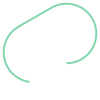

In [40]:
utils.path_2d(path)

In [41]:
occ.intersects(utils.path_2d(path))

True

In [14]:
occ.intersects(utils.path_2d(vm.tuples_to_path([(0.0,.0, .0), (10, 20, 0.0)])))

True

In [15]:
occ.intersects(geometry.Point(0.0, 0.0))

False

In [16]:
import networkx as nx

In [17]:
roadmap = nx.DiGraph()

In [18]:
roadmap.add_node((0.0, 0.0, 0.0))
roadmap.add_node((0.0, 1.0, 1.0))
roadmap.add_node((0.0, 1.5, 1.5))

In [19]:
path=vm.tuples_to_path([(0.0, 0.0, 0.0),(0.0, 1.0, 1.0)])
roadmap.add_edge((0.0, 0.0, 0.0), (0.0, 1.0, 1.0), path=path, cost=len(path))
path=vm.tuples_to_path([(0.0, 1.0, 1.0),(0.0, 1.5, 1.5)])
roadmap.add_edge((0.0, 1.0, 1.0), (0.0, 1.5, 1.5), path=path, cost=len(path))

In [20]:
s1 = nx.shortest_path(roadmap, (0.0, 0.0, 0.0), (0.0, 1.5, 1.5), weight="cost")
s1

[(0.0, 0.0, 0.0), (0.0, 1.0, 1.0), (0.0, 1.5, 1.5)]

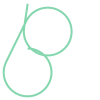

In [21]:
p1 = utils.path_2d(vm.tuples_to_path(s1))
p1

In [22]:
path=vm.tuples_to_path([(0.0, 0.0, 0.0),(0.0, 1.5, 1.5)])
roadmap.add_edge((0.0, 0.0, 0.0), (0.0, 1.5, 1.5), path=path, cost=len(path))
s2 = nx.shortest_path(roadmap, (0.0, 0.0, 0.0), (0.0, 1.5, 1.5), weight="cost")
s2

[(0.0, 0.0, 0.0), (0.0, 1.5, 1.5)]

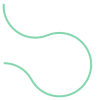

In [23]:
p2 = utils.path_2d(vm.tuples_to_path(s2))
p2

In [29]:
# plotting
import matplotlib.pyplot as plt
import shapely.ops as so
#from matplotlib.patches import Polygon
from descartes import PolygonPatch

/tmp/ipykernel_93768/1685327660.py:2: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  for poly in so.cascaded_union(occ):
/tmp/ipykernel_93768/1685327660.py:2: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in so.cascaded_union(occ):
/home/basti/.local/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/basti/.local/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


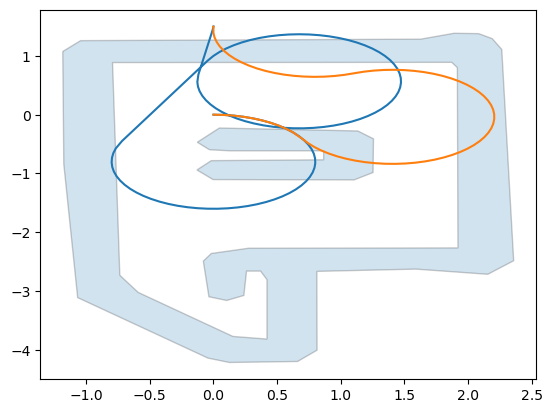

In [30]:
plt.figure()
for poly in so.cascaded_union(occ):
    ax = plt.gca()
    ax.add_patch(PolygonPatch(poly.buffer(0), alpha=0.2))
for path in [p1, p2]:
    plt.plot(*path.xy)
    
plt.show()

In [ ]:
p1.intersects(occ)

True

In [ ]:
p2.intersects(occ)

True

In [28]:
%pip install descartes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
